# Generalized Linear Models (Lab 1)

### Intro and objectives


### In this lab you will learn:
1. examples of generalized linear models
2. how to fit these models in Python


## What I hope you'll get out of this lab
* The feeling that you'll "know where to start" when you need to fit generalized linear models
* Worked Examples
* How to interpret the results obtained

In [13]:
!pip install wooldridge
!pip install linearmodels
import wooldridge as woo
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import linearmodels as plm
import numpy as np
from scipy import stats

# Example. The Program Effort Data

####  We will illustrate the use of linear models for continuous data using a small dataset extracted from Mauldin and Berelson (1978). The data include an index of social setting, an index of family planning effort, and the percent decline in the crude birth rate (CBR)—the number of births per thousand population—between 1965 and 1975, for 20 countries in Latin America and the Caribbean.





In [14]:
EffortDataFrame=pd.read_table('https://raw.githubusercontent.com/thousandoaks/M4DS202/main/data/effort.dat',sep='\s+')
EffortDataFrame.rename(columns={"setting": "SocialSetting", "effort":"FamilyPlanningEffort","change": "CrudeBirthRate"},inplace=True);

In [15]:
EffortDataFrame

,SocialSetting,FamilyPlanningEffort,CrudeBirthRate
Bolivia,46,0,1
Brazil,74,0,10
Chile,89,16,29
Colombia,77,16,25
CostaRica,84,21,29
Cuba,89,15,40
DominicanRep,68,14,21
Ecuador,70,6,0
ElSalvador,60,13,13
Guatemala,55,9,4


In [16]:
EffortDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Bolivia to Venezuela
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   SocialSetting         20 non-null     int64
 1   FamilyPlanningEffort  20 non-null     int64
 2   CrudeBirthRate        20 non-null     int64
dtypes: int64(3)
memory usage: 640.0+ bytes


#### The factor "SocialSetting" summarizes seven social indicators, namely literacy, school enrollment, life expectancy, infant mortality, percent of males aged 15–64 in the non-agricultural labor force, gross national product per capita and percent of population living in urban areas. Higher scores represent higher socio-economic levels.

#### The factor "FamilyPlanningEffort" combines 15 different program indicators, including such aspects as the existence of an official family planning policy, the availability of contraceptive methods, and the structure of the family planning program. An index of 0 denotes the absence of a program, 1–9 indicates weak programs, 10–19 represents moderate efforts and 20 or more denotes fairly strong programs.

### We are interested in determining the impact of FamilyPlanningEffort and SocialSetting on CrudeBirthRate.

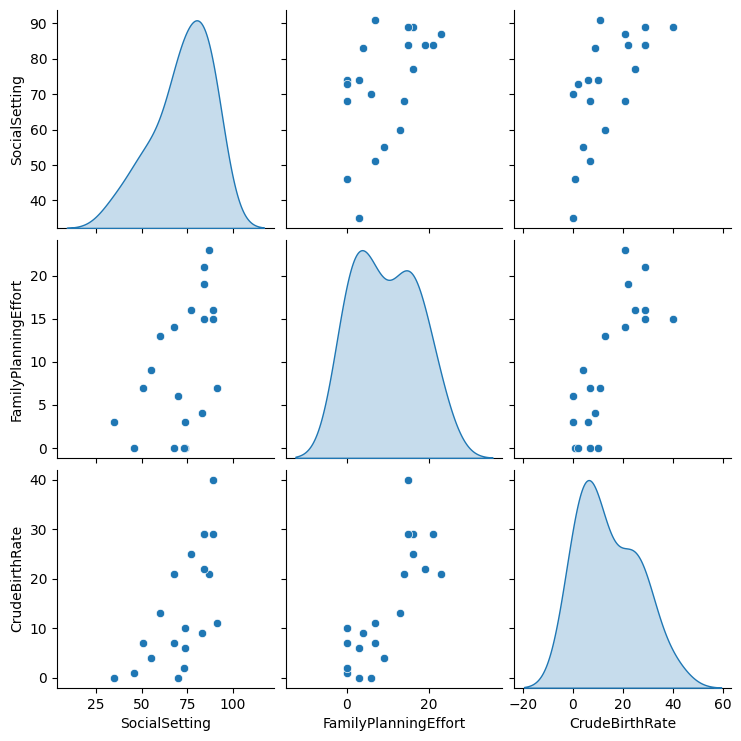

In [17]:
sns.pairplot(data=EffortDataFrame,diag_kind='kde')

#### Based on the previous figure we note that CBR decline is positively associated with both social setting and family planning effort. Note also that countries with higher socio-economic levels tend to have stronger family planning programs.

In [18]:
# Compute the correlation matrix
corr = EffortDataFrame.corr()

corr

,SocialSetting,FamilyPlanningEffort,CrudeBirthRate
SocialSetting,1.000000,0.50539,0.673203
FamilyPlanningEffort,0.505390,1.00000,0.800830
CrudeBirthRate,0.673203,0.80083,1.000000


#### Based on the previous correlation matrix we observe a positive and strong correlation between FamilyPlanningEffort and CrudeBirthRate as well as between SocialSetting and CrudeBirthRate.

## 1. The model

#### We will assume that the random variable CrudeBirthRate follows a normal distribution with mean $µ_i$ and variance $\sigma^2$, that is:

$CrudeBirthRate_i\sim N(\mu_i,\sigma^2)$


#### We further assume that the expected value $µ_i$ is a linear function of the two factors SocialSetting and FamilyPlanningEffort, that is:

$ \mu_i=\beta_1*SocialSetting+\beta_2*FamilyPlanningEffort $


## 2. Estimation of the parameters
#### We rely on our old friend OLS to fit the model.

In [19]:
reg = smf.ols(formula='CrudeBirthRate ~ SocialSetting + FamilyPlanningEffort ', data=EffortDataFrame)

# We fit the model
results = reg.fit()

In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         CrudeBirthRate   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     23.96
Date:                Fri, 16 Aug 2024   Prob (F-statistic):           1.13e-05
Time:                        10:09:27   Log-Likelihood:                -63.846
No. Observations:                  20   AIC:                             133.7
Df Residuals:                      17   BIC:                             136.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -14.4511      7.094     -2.037      0.058     -29.418       0.516
SocialSetting            0.2706      0.108      2.507      0.023       0.043       0.498
FamilyPlanningEffort     0.9677      0.225      4.301      0.000       0.493       1.442
==============================================================================
Omnibus:                        2.823   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.244   Jarque-Bera (JB):                1.142
Skew:                           0.436   Prob(JB):                        0.565
Kurtosis:                       3.781   Cond. No.                         370.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We have fit the following model:

$ \mu_i=-14.45+0.27*SocialSetting+0.967*FamilyPlanningEffort $

## 3. Model interpretation:


#### We find that, on average, the mean of CrudeBirthRate increases  0.27 points for each additional point of improvement in social setting at constant levels of family planning effort. Given the low p-value (0.023) we conclude that this effect is statistically significant.

#### Similarly, we find that on average the mean of CrudeBirthRate increases 0.96 points for each additional point of family planning effort at constant social setting.

#### The model is able to explain 73.8% of the total variability (R-sqared=0.73)



## 4. Regression Diagnostics

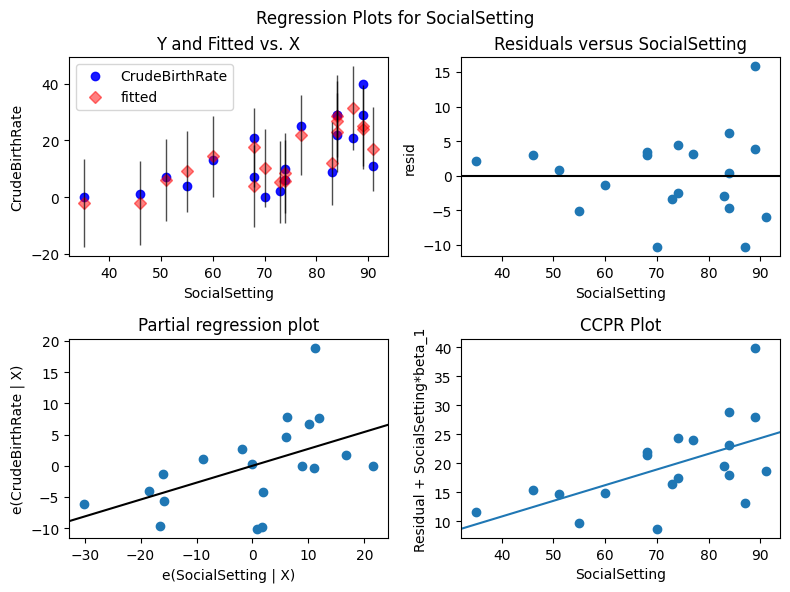

In [21]:
fig = plt.figure(figsize=(8, 6))
sm.graphics.plot_regress_exog(results, 'SocialSetting', fig=fig)
plt.show()

#### From the top right figure, We observe a non-constant spread of the residuals: a tendency for more dispersed residuals for large $y_i$. It would be advisable to tranform the response and the independent factors  (e.g taking logs or standarization).

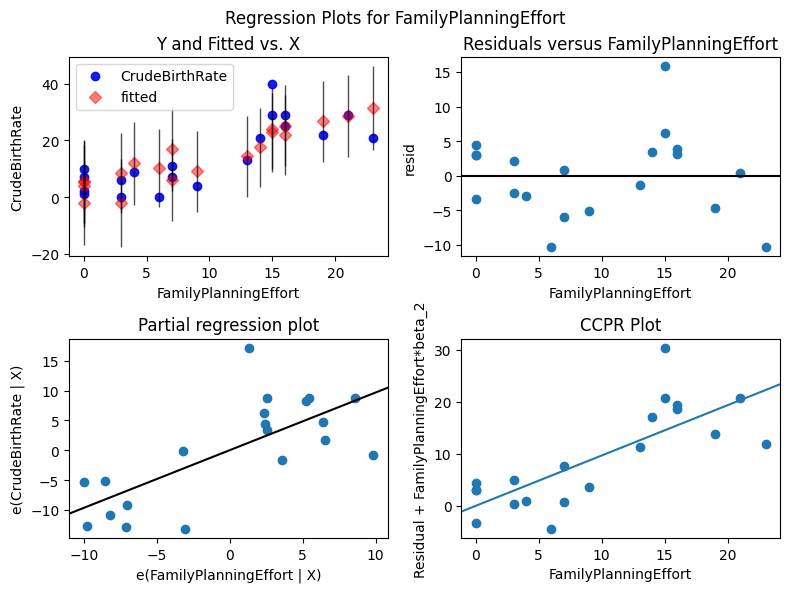

In [22]:
fig = plt.figure(figsize=(8, 6))
sm.graphics.plot_regress_exog(results, 'FamilyPlanningEffort', fig=fig)
plt.show()

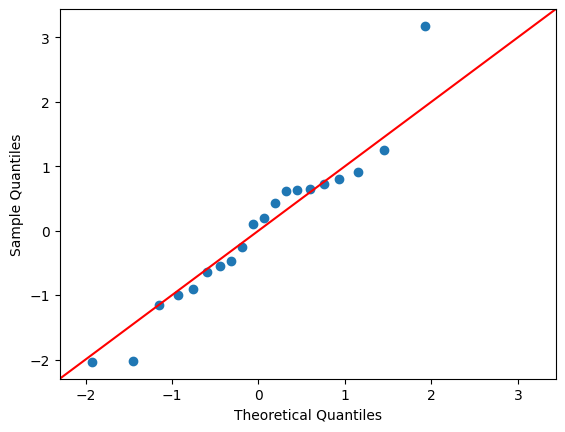

In [23]:
residuals = results.resid # residuals
fig = sm.qqplot(residuals,stats.t, fit=True, line="45")
plt.show()

#### Based on the previous Q-Q plot we conclude that we have no evidence against the assumption of normally distributed residuals.

#### We can further test the normality assumption by way of the Jarque-Bera test. The Jarque-Bera test statistic tests the null that the data is normally distributed against an alternative that the data follow some other distribution.

#### The Jarque-Bera test statistic is always positive, and if it is not close to zero, it shows that the sample data do not have a normal distribution. Based on the results below (J-B test: 1.14) we find no evidence against the normality assumption of residuals.

In [24]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(results.resid)
lzip(name, test)

[('Jarque-Bera', 1.1417043914008145),
 ('Chi^2 two-tail prob.', 0.565043705646779),
 ('Skew', 0.4360999123914612),
 ('Kurtosis', 3.7805848674741376)]